              Category  Count
6              Plastic    921
3                Metal    790
5                Paper    500
4  Miscellaneous Trash    495
0            Cardboard    461
8           Vegetation    436
2                Glass    420
1        Food Organics    411
7        Textile Trash    318


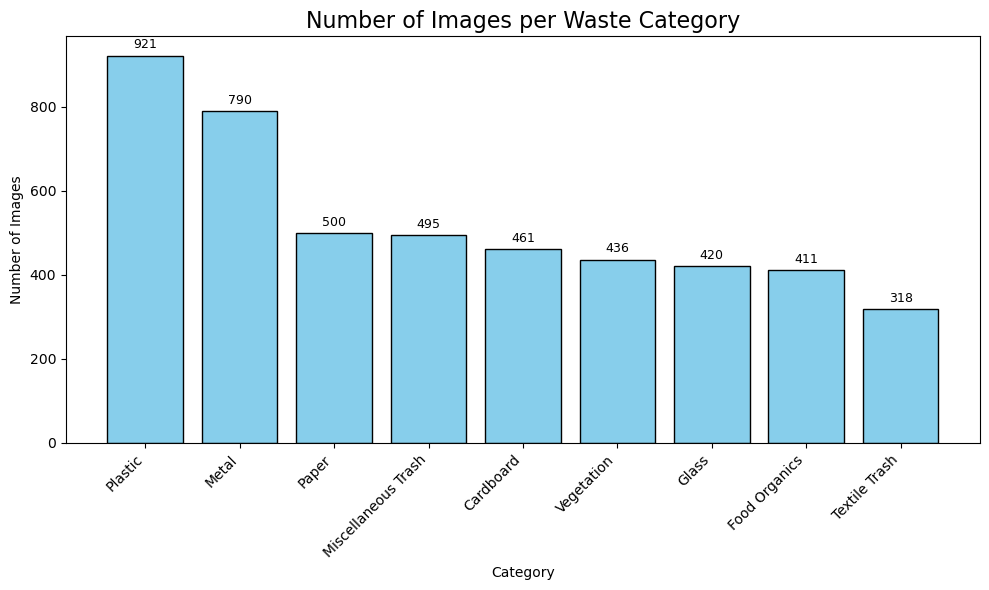

In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd

base_path = "../DATA/RealWaste"
output_dir = "../OUTPUT"
output_img = os.path.join(output_dir, "category_counts.png")

category_counts = {}
for category in os.listdir(base_path):
    folder_path = os.path.join(base_path, category)
    if os.path.isdir(folder_path):  # only count folders
        count = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        category_counts[category] = count

df = pd.DataFrame(list(category_counts.items()), columns=["Category", "Count"]).sort_values("Count", ascending=False)

print(df)

plt.figure(figsize=(10,6))
bars = plt.bar(df["Category"], df["Count"], color="skyblue", edgecolor="black")


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=9)

# First EDA
plt.title("Number of Images per Waste Category", fontsize=16)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(output_img, dpi=300, bbox_inches="tight")
plt.show()


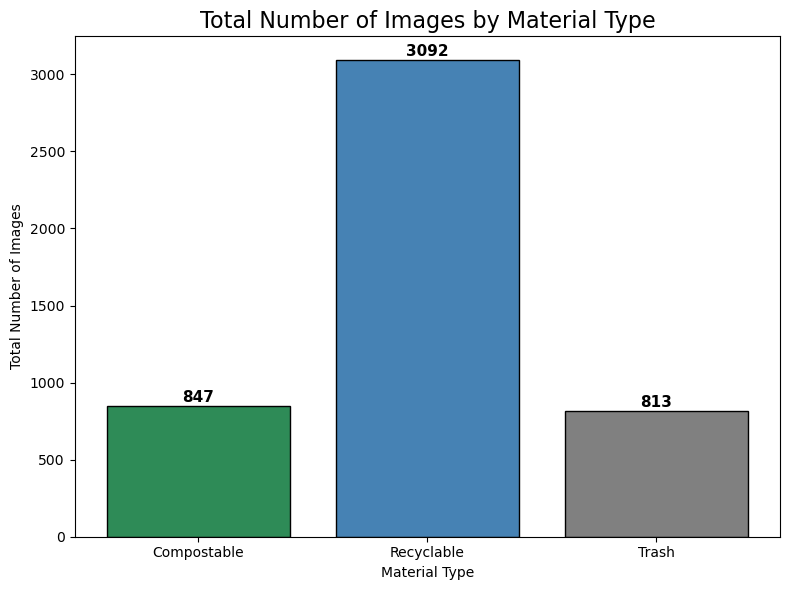

✅ Saved aggregated recyclability chart to: ../OUTPUT\category_counts_aggregated.png


In [13]:
# Second EDA
recyclable = ["Cardboard", "Glass", "Metal", "Paper", "Plastic"]
compostable = ["Food Organics", "Vegetation"]
trash = ["Miscellaneous Trash", "Textile Trash"]

def classify_material(cat):
    if cat in recyclable:
        return "Recyclable"
    elif cat in compostable:
        return "Compostable"
    else:
        return "Trash"

df["Type"] = df["Category"].apply(classify_material)

agg_df = df.groupby("Type", as_index=False)["Count"].sum()

color_map = {"Recyclable": "steelblue", "Compostable": "seagreen", "Trash": "gray"}
agg_df["Color"] = agg_df["Type"].map(color_map)

plt.figure(figsize=(8,6))
bars = plt.bar(agg_df["Type"], agg_df["Count"], color=agg_df["Color"], edgecolor="black")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             f"{int(bar.get_height())}", ha='center', va='bottom', fontsize=11, fontweight="bold")

plt.title("Total Number of Images by Material Type", fontsize=16)
plt.xlabel("Material Type")
plt.ylabel("Total Number of Images")
plt.tight_layout()

agg_chart_path = os.path.join(output_dir, "category_counts_aggregated.png")
plt.savefig(agg_chart_path, dpi=300, bbox_inches="tight")
plt.show()